In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
window_size = 10

def movingAndStd(window, values):
    window_size = window
    moving_avgs = np.convolve(values, np.ones(window_size)/window_size, mode='valid')
    std_devs = [np.std(values[max(0, i-window_size):i+1]) for i in range(len(values))]
    
    return moving_avgs, std_devs

In [6]:
# 글꼴과 크기를 설정
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15

def plotFigure(window_size, values, moving_avgs, std_devs, colorString, title, feature, save_path=None):
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(range(window_size-1, len(values)), moving_avgs, label='{} Moving Average'.format(feature), color=colorString)

    # 흐린 영역을 그립니다.
    ax.fill_between(range(window_size-1, len(values)), 
                    moving_avgs - std_devs[window_size-1:], 
                    moving_avgs + std_devs[window_size-1:], 
                    color=colorString, alpha=0.1) 

    ax.legend()
    
    # 제목 설정 및 그래프와 간격 조절
    ax.set_title("{} and Moving Average".format(title), fontsize=20, pad=10)
    
    # x축과 y축의 레이블 설정
    ax.set_xlabel('Episode', fontsize=15)
    ax.set_ylabel('{}'.format(feature), fontsize=15)
    
    # x축과 y축에만 눈금 표시
    ax.xaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # MATLAB 스타일 설정
    ax.set_facecolor((0.95, 0.95, 0.95))  # 배경색 설정
    for spine in ax.spines.values():  # 그래프 테두리 설정
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.5)
    
    # 그래프 저장
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

## DDPG

In [7]:
# CSV 파일에서 데이터를 읽습니다.
data = pd.read_csv("./202401251905/ddpg/50000_ddpg_rewards_proposed.csv")
data.head()

,Reward,Total Success,Total Congestion,N_Average Delay,Total Average Delay,Mean Slot Energy,Backoff Indicator,MaxTx
0,-0.792533,0.40612,0.576345,0.107848,122.691175,0.990294,20,10
1,-0.792835,0.40534,0.578114,0.099415,122.877041,0.990321,20,10
2,-1.089546,0.39622,0.659775,0.154205,1381.712029,0.248829,400,40
3,-0.778390,0.40542,0.572565,0.065761,97.557200,1.274955,10,17
4,-1.090055,0.39540,0.658507,0.161750,1385.403642,0.249050,400,24


In [8]:
rewards = data['Reward'].values
success = data['Total Success'].values
delay = data['Total Average Delay'].values
powerConsumption = data['Mean Slot Energy'].values
congestion = data['Total Congestion'].values

print(rewards[:5])
print(success[:5])
print(delay[:5])
print(powerConsumption[:5])
print(congestion[:5])

[-0.79253289 -0.79283544 -1.089546   -0.77838954 -1.09005476]
[0.40612 0.40534 0.39622 0.40542 0.3954 ]
[ 122.69117502  122.8770415  1381.71202867   97.55719994 1385.40364188]
[0.9902943  0.99032079 0.24882907 1.27495462 0.2490504 ]
[0.57634478 0.57811427 0.65977456 0.57256511 0.65850679]


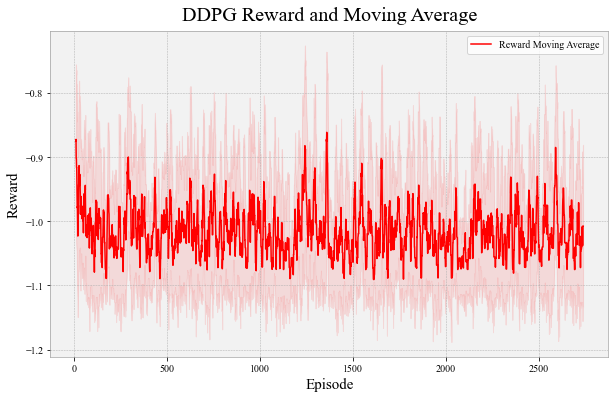

In [10]:
feature = 'Reward'
title = 'DDPG {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, rewards)

plotFigure(window_size, rewards, moving_avgs, std_devs, 'red', 
           title, 'Reward', save_path="./ResultGraph/01. {}.png".format(title))

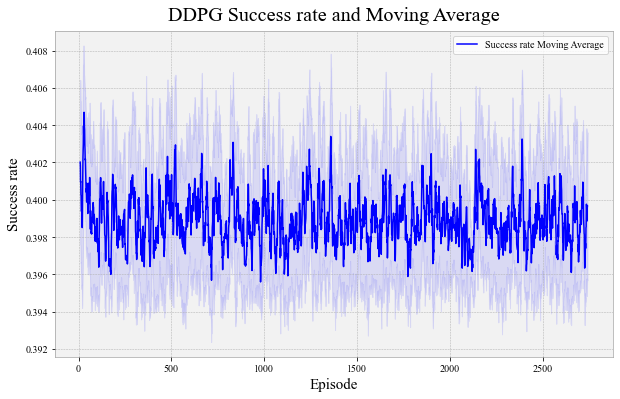

In [12]:
feature = 'Success rate'
title = 'DDPG {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, success)

plotFigure(window_size, success, moving_avgs, std_devs, 'blue', 
           title, feature, save_path="./ResultGraph/02. {}.png".format(title))

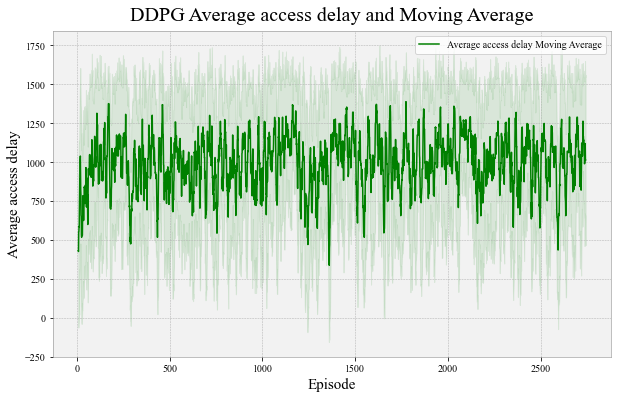

In [14]:
feature = 'Average access delay'
title = 'DDPG {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, delay)

plotFigure(window_size, delay, moving_avgs, std_devs, 'green', 
           title, feature, save_path="./ResultGraph/03. {}.png".format(title))

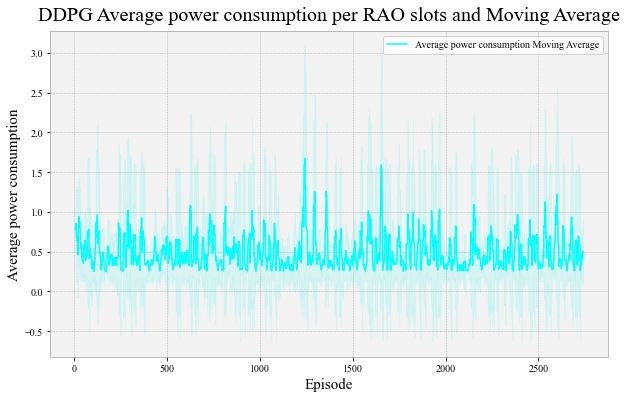

In [15]:
feature = 'Average power consumption'
title = 'DDPG {} per RAO slots'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, powerConsumption)

plotFigure(window_size, powerConsumption, moving_avgs, std_devs, 'cyan', 
           title, feature, save_path="./ResultGraph/04. {}.png".format(title))

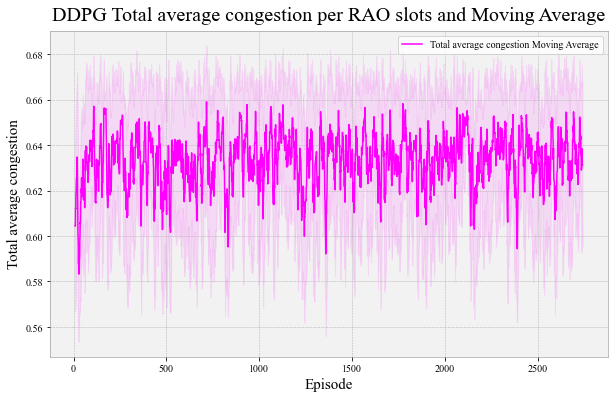

In [16]:
feature = 'Total average congestion'
title = 'DDPG {} per RAO slots'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, congestion)

plotFigure(window_size, congestion, moving_avgs, std_devs, 'magenta', 
           title, feature, save_path="./ResultGraph/05. {}.png".format(title))

## Q-learning

In [17]:
# CSV 파일에서 데이터를 읽습니다.
q_data = pd.read_csv("./202401251905/q-learning/50000_q_learning_new_rewards_proposed.csv")

In [18]:
rewards = q_data['Reward'].values
success = q_data['Total Success'].values
delay = q_data['Total Average Delay'].values
powerConsumption = q_data['Mean Slot Energy'].values
congestion = q_data['Total Congestion'].values

print(rewards[:5])
print(success[:5])
print(delay[:5])
print(powerConsumption[:5])
print(congestion[:5])

[0.89868 0.98674 0.5991  0.81326 0.611  ]
[0.33955917 0.0897544  0.56278273 0.45474723 0.55064932]
[672.80648 426.32303 293.9124  358.05257 300.02579]
[ 20  14 271 301 242]
[0.1006029  0.3270865  0.18842721 0.27386092 0.18863026]


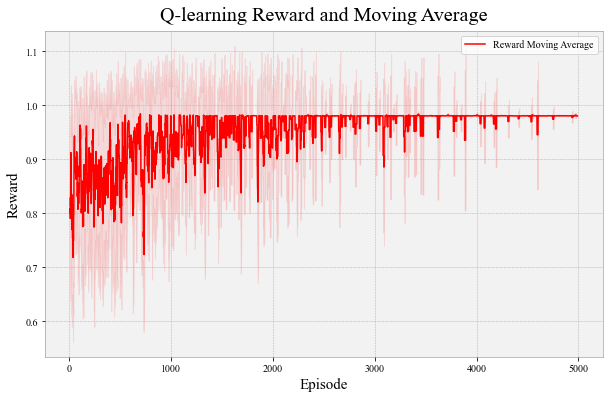

In [19]:
feature = 'Reward'
title = 'Q-learning {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, rewards)

plotFigure(window_size, rewards, moving_avgs, std_devs, 'red', 
           title, 'Reward', save_path="./ResultGraph/01. {}.png".format(title))

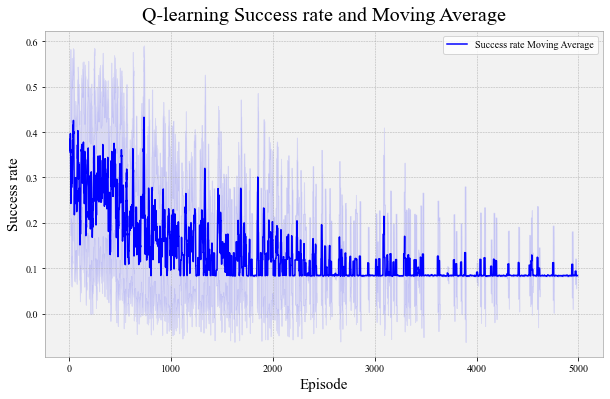

In [20]:
feature = 'Success rate'
title = 'Q-learning {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, success)

plotFigure(window_size, success, moving_avgs, std_devs, 'blue', 
           title, feature, save_path="./ResultGraph/02. {}.png".format(title))

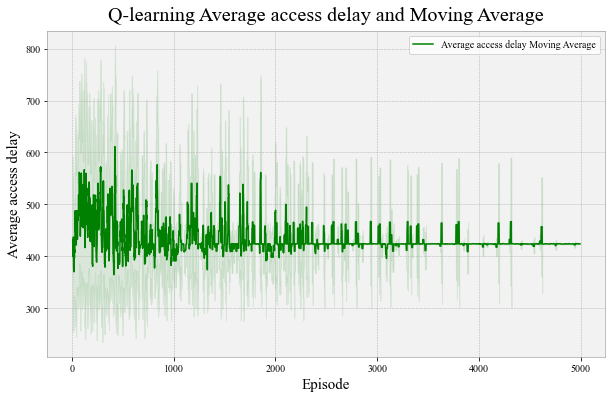

In [21]:
feature = 'Average access delay'
title = 'Q-learning {}'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, delay)

plotFigure(window_size, delay, moving_avgs, std_devs, 'green', 
           title, feature, save_path="./ResultGraph/03. {}.png".format(title))

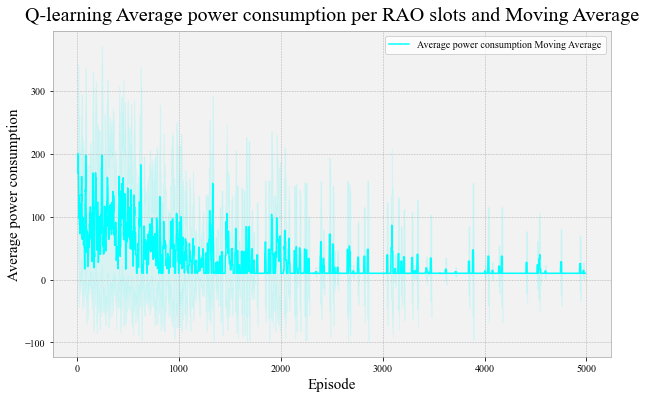

In [22]:
feature = 'Average power consumption'
title = 'Q-learning {} per RAO slots'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, powerConsumption)

plotFigure(window_size, powerConsumption, moving_avgs, std_devs, 'cyan', 
           title, feature, save_path="./ResultGraph/04. {}.png".format(title))

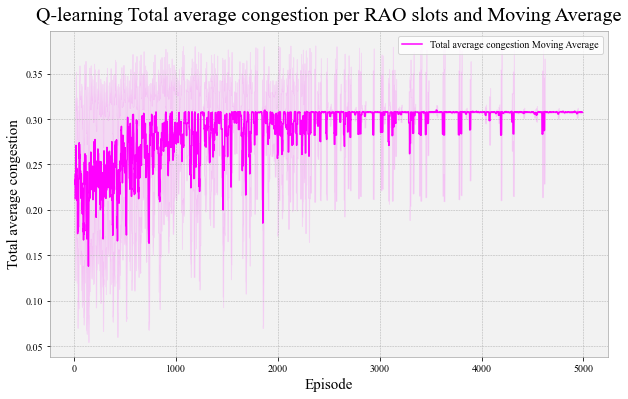

In [23]:
feature = 'Total average congestion'
title = 'Q-learning {} per RAO slots'.format(feature)
moving_avgs, std_devs = movingAndStd(window_size, congestion)

plotFigure(window_size, congestion, moving_avgs, std_devs, 'magenta', 
           title, feature, save_path="./ResultGraph/05. {}.png".format(title))